In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter
%matplotlib inline

In [2]:
thrd, hydro, gch, rad, gcr = np.loadtxt('../data/sparkGLM_M1_thrd4.dat', usecols=(0,1,2,3,4), unpack=True)
rnks, evo, hyd2, gch2, rad2, gcr2, grv = np.loadtxt('../data/sparkGLM_M1_strong.dat', usecols=(0,1,2,3,4,5,6), unpack=True)

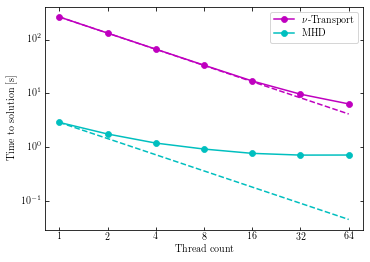

In [138]:
plt.figure(1,figsize=(5,3.5))

ax1 = plt.gca()
thing = rad-gcr
ax1.plot(thrd, thing, 'mo-', label=r"$\nu$-Transport")
ax1.plot(thrd, thing[0]/thrd, 'm--')
thing = hydro-gch
ax1.plot(thrd, thing, 'co-', label="MHD")
ax1.plot(thrd, thing[0]/thrd, 'c--')
#thing = rad+hydro
#plt.plot(thrd, thing, 'k-', label="Total")
#plt.plot(thrd, thing[0]/thrd, 'k--')
ax1.loglog()
ax1.set_ylabel("Time to solution [s]")
ax1.set_xlabel("Thread count")
ax1.set_xticks([1,2,4,8,16,32,64])
#ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.legend()
plt.minorticks_off()



plt.tight_layout(pad=0.2)
plt.savefig("thrdSpeedupSparkM1.pdf")

In [103]:
nodes, blks, wkEvo, wkHyd, wkGCH, wkRad, wkGCR = np.loadtxt('../data/sparkGLM_M1_weak.dat', usecols=(0,1,2,3,4,5,6), unpack=True)

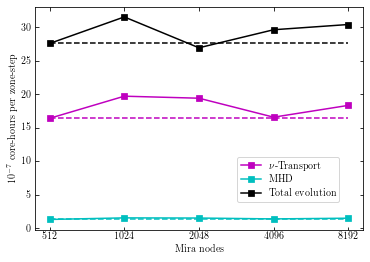

In [137]:
plt.figure(1,figsize=(5,3.5))

ax2=plt.gca()

thing = 16.*nodes*wkRad/3600./(blks*12**3*10)*1e7
ax2.plot(nodes, thing, 'ms-', label=r"$\nu$-Transport")
ax2.plot(nodes, thing[0]*nodes/nodes, 'm--')
thing = 16.*nodes*wkHyd/3600./(blks*12**3*10)*1e7
ax2.plot(nodes, thing, 'cs-', label="MHD")
ax2.plot(nodes, thing[0]*nodes/nodes, 'c--')
thing = 16.*nodes*wkEvo/3600./(blks*12**3*10)*1e7
ax2.plot(nodes, thing, 'ks-', label="Total evolution")
ax2.plot(nodes, thing[0]*nodes/nodes, 'k--')
ax2.semilogx()
ax2.set_ylabel("$10^{-7}$ core-hours per zone-step")
ax2.set_xlabel("Mira nodes")
ax2.set_xticks([512,1024,2048,4096,8192])
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.minorticks_off()

ax2.legend(bbox_to_anchor=(0.6, 0.1),loc='best')

plt.tight_layout(pad=0.2)
plt.savefig("wkScaleSparkM1.pdf")

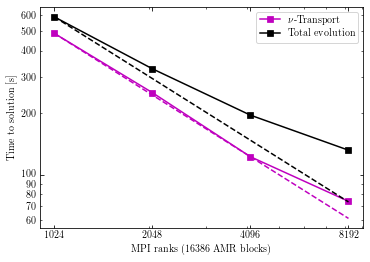

In [140]:
plt.figure(1,figsize=(5,3.5))
ax2=plt.gca()

thing = rad2
ax2.plot(rnks, thing, 'ms-', label=r"$\nu$-Transport")
ax2.plot(rnks, thing[0]*rnks[0]/rnks, 'm--')
thing = hyd2
#ax2.plot(rnks, thing, 'cs-', label="MHD")
#ax2.plot(rnks, thing[0]*rnks[0]/rnks, 'c--')
thing = evo
ax2.plot(rnks, thing, 'ks-', label="Total evolution")
ax2.plot(rnks, thing[0]*rnks[0]/rnks, 'k--')
ax2.loglog()
ax2.set_ylabel("Time to solution [s]")
ax2.set_xlabel("MPI ranks (16386 AMR blocks)")
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
#ax2.yaxis.set_minor_formatter(NullFormatter())

ax2.set_xticks([1024,2048,4096,8192])
#ax2.set_xticks([])
#plt.minorticks_off()

ax2.legend()

plt.tight_layout(pad=0.2)
plt.savefig("strScaleSparkM1.pdf")

## Total speedup factor of RadTrans:

In [24]:
thing = rad
thing[0]/thing[-1]


27.048027444253858

## Total memory footprint:

In [7]:
nvars = 190.
tables = 560 #Megabytes
nxb = 20.
nguard = 10.
maxblock = 12.
overhead = 1.5
print(overhead*nvars*(nxb+2.*nguard)**3*maxblock*8./1e6+tables)

2311.04


## Core-hours per zone-step:

In [67]:
steps=10.
nxb = 20.
leafb = 4192
nodes = 512
cores=16
time = 600.002
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

4.071260390161153e-06
68.22893923686921


In [54]:
# mesa20b
steps=10988.
nxb = 8.
leafb = 125929
nodes = 2048
cores=16
time = 80050.
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

1.0284765740500481e-06


In [55]:
# mesa20_LR
steps=23191.
nxb = 8.
leafb = 45737
nodes = 2048
cores=16
time = 82664.047
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

1.3855014538686875e-06


In [56]:
# mesa20_v_LR
steps=13662.
nxb = 8.
leafb = 44414
nodes = 2048
cores=16
time = 83099.605
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

2.4346821036031405e-06


In [42]:
# sparkTest
steps=10.
nxb = 12.
leafb = 16386
nodes = 1024
cores=16
time = 195.
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

3.1342624613302834e-06


In [28]:
# sparkTest 12^3 blocks, 
steps=10.
nxb = 12.
leafb = 1
nodes = 1
cores=4
time = 2.344+20.57
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

1.4733796296296297e-06


In [66]:
# sparkTest 12^3 blocks, estimage for CoreBurn 
steps=10.
nxb = 12.
leafb = 1
nodes = 1
cores=4
time = 2.344*1.25
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

1.8840020576131686e-07


In [68]:
# sparkTest on fawkes, spark3 20^3 with vdep
steps=10.
nxb = 20.
leafb = 1
nodes = 1
cores=2
time = 29.199
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

2.0277083333333336e-07
1369.9099284222061


In [142]:
# sparkTest on fawkes, spark3 12^3 with vdep 3step
steps=20.
nxb = 12.
leafb = 1
nodes = 1
cores=1
time = 22.364
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

1.7975180041152264e-07
1545.340726167054


In [35]:
# sparkTest on Theta, spark3 12^3 with vdep
steps=10.
nxb = 12.
leafb = 1
nodes = 1
cores=1
time = 35.14
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

5.648791152263374e-07


In [36]:
# sparkTest on Theta, spark3 12^3 with vdep weak
steps=10.
nxb = 12.
leafb = 9890
nodes = 8
cores=64
time = 873.321
print(nodes*cores*time/3600./(steps*leafb*nxb**3))

7.267772659751089e-07


In [39]:
# spark FieldLoop 2 blocks 12^3 with vdep weak 3.3 GHz Core i7 (I7-6567U)
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 1.071
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

2.1520543981481477e-09
129075.63025210085


In [40]:
# USM FieldLoop 2 blocks 12^3 with vdep weak 3.3 GHz Core i7 (I7-6567U)
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 3.529
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

7.091129758230453e-09
39172.570133182206


In [43]:
# spark FieldLoop 2 blocks 12^3 with vdep weak Laconia Intel Xeon E5-2680v4
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 0.876
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

1.7602237654320987e-09
157808.2191780822


In [44]:
# USM FieldLoop 2 blocks 12^3 with vdep weak Laconia Intel Xeon E5-2680v4
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 2.202
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

4.4246720679012344e-09
62779.29155313352


In [45]:
# USM FieldLoop 2 blocks 12^3 with vdep weak IBM BG/Q 
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 32.749
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

6.58054430298354e-08
4221.197593819658


In [46]:
# Spark FieldLoop 2 blocks 12^3 with vdep weak IBM BG/Q 
steps=10.
nxb = 12.
leafb = 8
nodes = 1
cores=1
time = 12.815
print(nodes*cores*time/3600./(steps*leafb*nxb**3))
print((steps*leafb*nxb**3)/(nodes*cores*time))

2.575030542695473e-08
10787.3585641826


## Some order-of-mag estimates for cost

For single-step, single stage:

- Number of guardcells = 6 (because of Hydro)
- Number of Hydro RHS evals = 2
- Number of M1 RHS evals = 1
- M1 CFL = 0.3
- Number of gcell fills = 2 (1 Hydro, 1 M1)
- Cost of gcell fill = 1
- Cost of 1 RHS = 1

For twoStep:

- Number of guardcells = 6 (because of Hydro)
- Number of Hydro RHS evals = 2
- Number of M1 RHS evals = 2
- M1 CFL = 0.6
- Number of gcell fills = 2 (1 Hydro, 1 M1)
- Cost of gcell fill = 1
- Cost of 1 RHS = 1

For threeStep:

- Number of guardcells = 6 (because of Hydro)
- Number of Hydro RHS evals = 2
- Number of M1 RHS evals = 3
- M1 CFL = 0.9
- Number of gcell fills = 2 (1 Hydro, 1 M1)
- Cost of gcell fill = 1
- Cost of 1 RHS = 1

For twoStepRK2:

- Number of guardcells = 10 (because of Hydro)
- Number of Hydro RHS evals = 3
- Number of M1 RHS evals = 4
- M1 CFL = 1.6
- Number of gcell fills = 2 (1 Hydro, 1 M1)
- Cost of gcell fill = 3.14
- Cost of 1 RHS = 2

In [93]:
pi43 = 4./3.*np.pi
(.5*200**3)**(1./3.)

158.7401051968199

## Progenitors from Heger et al. (2005)

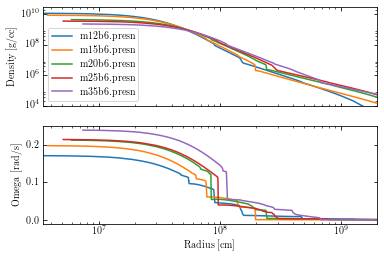

In [26]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m12b6.presn", "m15b6.presn", "m20b6.presn", "m25b6.presn", "m35b6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

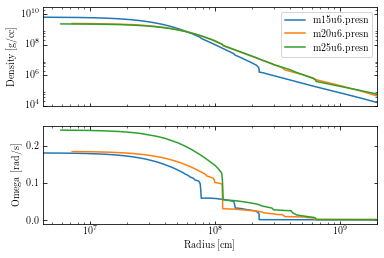

In [27]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m15u6.presn", "m20u6.presn", "m25u6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

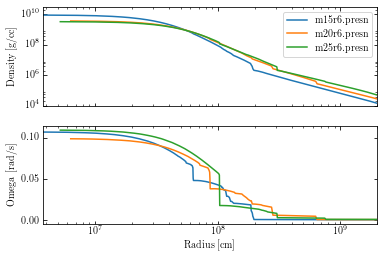

In [28]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m15r6.presn", "m20r6.presn", "m25r6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

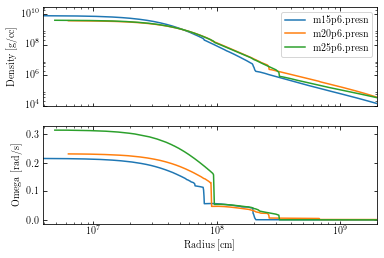

In [29]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m15p6.presn", "m20p6.presn", "m25p6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

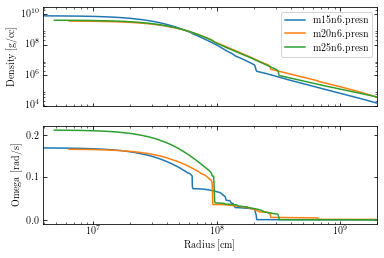

In [30]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m15n6.presn", "m20n6.presn", "m25n6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

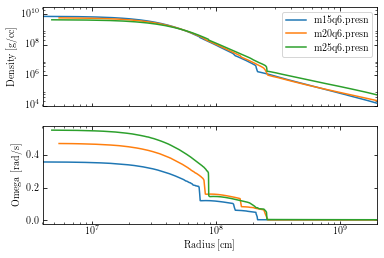

In [31]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m15q6.presn", "m20q6.presn", "m25q6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax1.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

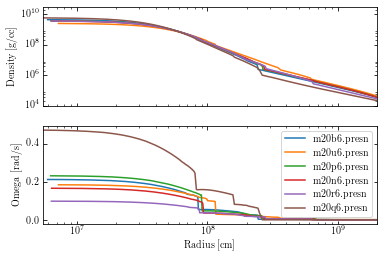

In [34]:
fig1, (ax1,ax2) = plt.subplots(2,1,sharex=True)
files = ["m20b6.presn", "m20u6.presn", "m20p6.presn", "m20n6.presn", "m20r6.presn", "m20q6.presn"]

for file in files:
    mass, radius, velx, dens, temp, pres, vphi, ye = np.loadtxt("/Users/smc/ownCloud/Heger2005/"+file, usecols=(1,2,3,4,5,6,9,11),unpack=True,skiprows=2)
    ax1.plot(radius,dens,label=file)
    ax2.plot(radius,vphi,label=file)
ax1.loglog()
ax2.legend()
ax1.set_xlim((0,2e9))
ax1.set_ylim((1e4,3e10))
ax2.set_xlabel("Radius [cm]")
ax1.set_ylabel("Density [g/cc]")
ax2.set_ylabel("Omega [rad/s]")

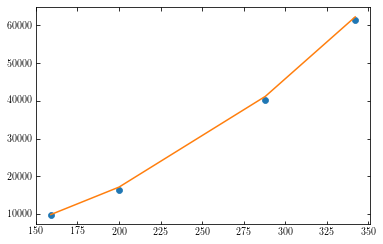

In [102]:
rhole = np.array([159, 200, 288, 342])
blks = np.array([9890, 16386, 40298, 61354])
plt.plot(rhole, blks, 'o')
plt.plot(rhole, blks[0]*(rhole/rhole[0])**(2.4))

In [64]:
def rad_hole(blks):
    return 200*(blks/16386)**(1./2.4)

In [73]:
print(rad_hole(768000))

993.6500101041922
